In [179]:
import os
from dotenv import load_dotenv
import cfbd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import ast

load_dotenv()
API_KEY = os.getenv("CFBD_API_KEY")

configuration = cfbd.Configuration()
api_client = cfbd.ApiClient(configuration)
api_client.default_headers["Authorization"] = f"Bearer {API_KEY}"


In [131]:
games_api = cfbd.GamesApi(api_client)
games = games_api.get_games(year=2025, season_type="postseason")
games = pd.DataFrame([g.to_dict() for g in games])
games[[
    "id",
    "homeTeam",
    "awayTeam",
    "homePoints",
    "awayPoints"
]]

,id,homeTeam,awayTeam,homePoints,awayPoints
0,401778123,Prairie View A&M,South Carolina State,38.0,40.0
1,401778302,Washington,Boise State,38.0,10.0
2,401778303,Jacksonville State,Troy,17.0,13.0
3,401778304,South Florida,Old Dominion,10.0,24.0
4,401778305,Delaware,Louisiana,20.0,13.0
...,...,...,...,...,...
78,401834625,Hope College,Wisconsin-Lacrosse,7.0,9.0
79,401834617,Trinity University TX,Hardin-Simmons,34.0,24.0
80,401834627,Wisconsin-Whitewater,Depauw,23.0,26.0
81,401834628,Saint John's (MN),Monmouth (IL),49.0,15.0


In [132]:
target_game_ids = [401779842, 401779843]

target_games = games[games["id"].isin(target_game_ids)]
target_games

,id,season,week,seasonType,startDate,startTimeTBD,completed,neutralSite,conferenceGame,venueId,...,awayLineScores,awayPostgameWinProbability,excitementIndex,highlights,notes,attendance,homePregameElo,homePostgameElo,awayPregameElo,awayPostgameElo
11,401779842,2025,1,SeasonType.POSTSEASON,2025-12-20 20:30:00+00:00,False,True,False,False,3974,...,"[0, 3, 0, 7]",0.013928,2.962734,,College Football Playoff First Round Game,None,1960.0,2004.0,1627.0,1583.0
16,401779843,2025,1,SeasonType.POSTSEASON,2025-12-21 00:30:00+00:00,False,True,False,False,3626,...,"[3, 3, 14, 14]",0.000000,3.277116,,College Football Playoff First Round Game,None,2087.0,2109.0,1927.0,1905.0


In [133]:
drives_api = cfbd.DrivesApi(api_client)

drives = drives_api.get_drives(
        year=2025,
        season_type="postseason",
        team="James Madison"
    )

drives_OU_vs_JMU = pd.DataFrame([d.to_dict() for d in drives])
drives_OU_vs_JMU.to_csv("drives_OU_vs_JMU.csv", index=False)
drives_OU_vs_JMU

,offense,offenseConference,defense,defenseConference,gameId,id,driveNumber,scoring,startPeriod,startYardline,...,endTime,elapsed,plays,yards,driveResult,isHomeOffense,startOffenseScore,startDefenseScore,endOffenseScore,endDefenseScore
0,Oregon,Big Ten,James Madison,Sun Belt,401779843,4017798432,1,True,1,32,...,"{'seconds': 17, 'minutes': 13}","{'seconds': 38, 'minutes': 1}",4,68,TD,True,0,0,6,0
1,James Madison,Sun Belt,Oregon,Big Ten,401779843,4017798434,2,True,1,75,...,"{'seconds': 14, 'minutes': 5}","{'seconds': 3, 'minutes': 8}",15,63,FG,False,0,6,3,6
2,Oregon,Big Ten,James Madison,Sun Belt,401779843,4017798436,3,True,1,25,...,"{'seconds': 37, 'minutes': 2}","{'seconds': 37, 'minutes': 2}",5,75,TD,True,6,3,13,3
3,James Madison,Sun Belt,Oregon,Big Ten,401779843,4017798438,4,False,1,75,...,"{'seconds': 7, 'minutes': 13}","{'seconds': 30, 'minutes': 4}",10,53,MISSED FG,False,3,13,3,13
4,Oregon,Big Ten,James Madison,Sun Belt,401779843,4017798439,5,True,2,22,...,"{'seconds': 33, 'minutes': 11}","{'seconds': 34, 'minutes': 1}",3,78,TD,True,13,3,20,3
5,James Madison,Sun Belt,Oregon,Big Ten,401779843,40177984311,6,False,2,75,...,"{'seconds': 36, 'minutes': 10}","{'seconds': 57, 'minutes': 0}",3,-4,PUNT,False,3,20,3,20
6,Oregon,Big Ten,James Madison,Sun Belt,401779843,40177984312,7,True,2,37,...,"{'seconds': 18, 'minutes': 9}","{'seconds': 18, 'minutes': 1}",4,63,TD,True,20,3,27,3
7,James Madison,Sun Belt,Oregon,Big Ten,401779843,40177984314,8,False,2,75,...,"{'seconds': 7, 'minutes': 6}","{'seconds': 11, 'minutes': 3}",6,21,PUNT,False,3,27,3,34
8,Oregon,Big Ten,James Madison,Sun Belt,401779843,40177984315,9,True,2,20,...,"{'seconds': 22, 'minutes': 4}","{'seconds': 45, 'minutes': 1}",5,80,TD,True,27,3,34,3
9,James Madison,Sun Belt,Oregon,Big Ten,401779843,40177984317,10,False,2,76,...,"{'seconds': 34, 'minutes': 1}","{'seconds': 43, 'minutes': 2}",7,33,PUNT,False,3,34,3,34


In [134]:
drives = drives_api.get_drives(
        year=2025,
        season_type="postseason",
        team="Tulane"
    )

drives_OM_vs_Tulane = pd.DataFrame([d.to_dict() for d in drives])
drives_OM_vs_Tulane.to_csv("drives_OM_vs_Tulane.csv", index=False)
drives_OM_vs_Tulane

,offense,offenseConference,defense,defenseConference,gameId,id,driveNumber,scoring,startPeriod,startYardline,...,endTime,elapsed,plays,yards,driveResult,isHomeOffense,startOffenseScore,startDefenseScore,endOffenseScore,endDefenseScore
0,Ole Miss,SEC,Tulane,American Athletic,401779842,4017798422,1,True,1,25,...,"{'seconds': 1, 'minutes': 14}","{'seconds': 59, 'minutes': 0}",3,75,TD,True,0,0,7,0
1,Tulane,American Athletic,Ole Miss,SEC,401779842,4017798424,2,False,1,75,...,"{'seconds': 47, 'minutes': 8}","{'seconds': 14, 'minutes': 5}",10,52,INT,False,0,7,0,7
2,Ole Miss,SEC,Tulane,American Athletic,401779842,4017798425,3,True,1,40,...,"{'seconds': 26, 'minutes': 7}","{'seconds': 21, 'minutes': 1}",4,60,TD,True,7,0,14,0
3,Tulane,American Athletic,Ole Miss,SEC,401779842,4017798427,4,False,1,75,...,"{'seconds': 8, 'minutes': 3}","{'seconds': 18, 'minutes': 4}",8,38,DOWNS,False,0,14,0,14
4,Ole Miss,SEC,Tulane,American Athletic,401779842,4017798428,5,False,1,37,...,"{'seconds': 5, 'minutes': 1}","{'seconds': 3, 'minutes': 2}",3,1,PUNT,True,14,0,14,0
5,Tulane,American Athletic,Ole Miss,SEC,401779842,4017798429,6,True,1,82,...,"{'seconds': 6, 'minutes': 14}","{'seconds': 59, 'minutes': 1}",5,61,FG,False,0,14,3,14
6,Ole Miss,SEC,Tulane,American Athletic,401779842,40177984211,7,False,2,25,...,"{'seconds': 1, 'minutes': 12}","{'seconds': 5, 'minutes': 2}",6,15,PUNT,True,14,3,14,3
7,Tulane,American Athletic,Ole Miss,SEC,401779842,40177984212,8,False,2,81,...,"{'seconds': 18, 'minutes': 8}","{'seconds': 43, 'minutes': 3}",7,33,PUNT,False,3,14,3,14
8,Ole Miss,SEC,Tulane,American Athletic,401779842,40177984213,9,True,2,13,...,"{'seconds': 38, 'minutes': 3}","{'seconds': 40, 'minutes': 4}",11,62,FG,True,14,3,17,3
9,Tulane,American Athletic,Ole Miss,SEC,401779842,40177984215,10,False,2,67,...,"{'seconds': 53, 'minutes': 1}","{'seconds': 38, 'minutes': 1}",3,2,PUNT,False,3,17,3,17


In [135]:
plays_api = cfbd.PlaysApi(api_client)

plays = plays_api.get_plays(
    year=2025,
    week=1,
    season_type="postseason",
    offense= "James Madison"
    
)
ofplays_JMU = pd.DataFrame([p.to_dict() for p in plays])
ofplays_JMU


,id,driveId,gameId,driveNumber,playNumber,offense,offenseConference,offenseScore,defense,home,...,yardline,yardsToGoal,down,distance,yardsGained,scoring,playType,playText,wallclock,ppa
0,4017798433,4017798432,401779843,1,1,James Madison,Sun Belt,0,Oregon,Oregon,...,65,65,1,10,32,False,Kickoff,(15:00) #95 C.Rosa kickoff 65 yards to the ORE...,2025-12-21T00:40:48.000Z,NaN
1,40177984346,4017798434,401779843,2,2,James Madison,Sun Belt,0,Oregon,Oregon,...,75,75,1,10,0,False,Rush,(13:14) No Huddle-Shotgun #3 W.Knight rush mid...,2025-12-21T00:47:50.000Z,-0.702970
2,40177984350,4017798434,401779843,2,3,James Madison,Sun Belt,0,Oregon,Oregon,...,75,75,2,10,24,False,Rush,(12:32) No Huddle-Shotgun #3 W.Knight rush rig...,2025-12-21T00:48:32.000Z,2.857358
3,40177984354,4017798434,401779843,2,4,James Madison,Sun Belt,0,Oregon,Oregon,...,51,51,1,10,5,False,Pass Reception,(11:55) No Huddle-Shotgun #14 A.Barnett III pa...,2025-12-21T00:49:12.000Z,0.103214
4,40177984359,4017798434,401779843,2,5,James Madison,Sun Belt,0,Oregon,Oregon,...,46,46,2,5,0,False,Fumble Recovery (Own),(11:15) No Huddle-Shotgun #14 A.Barnett III ru...,2025-12-21T00:49:55.000Z,-1.159077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,401779843813,40177984340,401779843,25,8,James Madison,Sun Belt,26,Oregon,Oregon,...,50,50,3,5,49,False,Rush,(02:16) No Huddle-Shotgun #3 W.Knight rush mid...,2025-12-21T04:21:14.000Z,4.428101
115,401779843817,40177984340,401779843,25,9,James Madison,Sun Belt,26,Oregon,Oregon,...,1,1,1,1,15,False,Penalty,(01:55) No Huddle-Shotgun #14 A.Barnett III pa...,2025-12-21T04:25:12.000Z,NaN
116,401779843821,40177984340,401779843,25,10,James Madison,Sun Belt,26,Oregon,Oregon,...,16,16,1,16,0,False,Pass Incompletion,(01:53) No Huddle-Shotgun #14 A.Barnett III pa...,2025-12-21T04:25:59.000Z,-0.291891
117,401779843824,40177984340,401779843,25,11,James Madison,Sun Belt,26,Oregon,Oregon,...,16,16,2,16,13,False,Pass Reception,(01:50) No Huddle-Shotgun #14 A.Barnett III pa...,2025-12-21T04:26:43.000Z,0.551984


In [136]:
plays = plays_api.get_plays(
    year=2025,
    week=1,
    season_type="postseason",
    offense= "Oregon"
    
)
ofplays_OU = pd.DataFrame([p.to_dict() for p in plays])
ofplays_OU.to_csv("ofplays_OU.csv", index=False)
ofplays_OU

,id,driveId,gameId,driveNumber,playNumber,offense,offenseConference,offenseScore,defense,home,...,yardline,yardsToGoal,down,distance,yardsGained,scoring,playType,playText,ppa,wallclock
0,40177984314,4017798432,401779843,1,2,Oregon,Big Ten,0,James Madison,Oregon,...,32,68,1,10,9,False,Rush,(14:52) Shotgun #6 N.Whittington rush left for...,1.374515,2025-12-21T00:41:37.000Z
1,40177984318,4017798432,401779843,1,3,Oregon,Big Ten,0,James Madison,Oregon,...,41,59,2,1,4,False,Pass Reception,(14:17) Shotgun #5 D.Moore pass complete short...,-0.131817,2025-12-21T00:42:15.000Z
2,40177984323,4017798432,401779843,1,4,Oregon,Big Ten,0,James Madison,Oregon,...,45,55,1,10,14,False,Pass Reception,(13:47) Shotgun #5 D.Moore pass complete short...,1.036094,2025-12-21T00:42:45.000Z
3,40177984328,4017798432,401779843,1,5,Oregon,Big Ten,6,James Madison,Oregon,...,59,41,1,10,41,True,Passing Touchdown,(13:23) No Huddle-Shotgun #5 D.Moore pass comp...,3.240520,2025-12-21T00:43:10.000Z
4,40177984343,4017798434,401779843,2,1,Oregon,Big Ten,6,James Madison,Oregon,...,35,65,1,10,0,False,Kickoff,(13:17) #36 A.Sappington kickoff 65 yards to t...,NaN,2025-12-21T00:45:21.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,401779843765,40177984338,401779843,24,9,Oregon,Big Ten,48,James Madison,Oregon,...,66,34,1,25,10,False,Rush,(05:55) #27 J.Limar rush middle for 10 yards g...,0.790920,2025-12-21T04:09:03.000Z
67,401779843769,40177984338,401779843,24,10,Oregon,Big Ten,48,James Madison,Oregon,...,76,24,2,15,-2,False,Pass Reception,(05:11) Shotgun #5 D.Moore pass complete short...,-1.091050,2025-12-21T04:09:47.000Z
68,401779843774,40177984338,401779843,24,12,Oregon,Big Ten,48,James Madison,Oregon,...,74,26,3,17,-4,False,Pass Reception,(04:28) Shotgun #5 D.Moore pass complete short...,-1.724276,2025-12-21T04:10:29.000Z
69,401779843779,40177984338,401779843,24,13,Oregon,Big Ten,51,James Madison,Oregon,...,70,30,4,21,48,True,Field Goal Good,(04:22) #36 A.Sappington field goal attempt fr...,NaN,2025-12-21T04:14:41.000Z


In [137]:
plays = plays_api.get_plays(
    year=2025,
    week=1,
    season_type="postseason",
    offense= "Tulane"
    
)
ofplays_Tulane = pd.DataFrame([p.to_dict() for p in plays])
ofplays_Tulane.to_csv("ofplays_Tulane.csv", index=False)
ofplays_Tulane

,id,driveId,gameId,driveNumber,playNumber,offense,offenseConference,offenseScore,defense,home,...,yardline,yardsToGoal,down,distance,yardsGained,scoring,playType,playText,wallclock,ppa
0,4017798423,4017798422,401779842,1,1,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,65,65,1,10,0,False,Kickoff,(15:00) #91 P.Durkin kickoff 65 yards to the O...,2025-12-20T20:38:16.000Z,NaN
1,40177984232,4017798424,401779842,2,2,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,75,75,1,10,9,False,Rush,(14:00) No Huddle-Shotgun #25 J.McClure rush m...,2025-12-20T20:45:05.000Z,1.252308
2,40177984236,4017798424,401779842,2,3,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,66,66,2,1,16,False,Rush,(13:30) No Huddle-Shotgun #12 J.Retzlaff rush ...,2025-12-20T20:45:38.000Z,0.984035
3,40177984240,4017798424,401779842,2,4,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,50,50,1,10,3,False,Rush,(12:59) No Huddle-Shotgun #25 J.McClure rush m...,2025-12-20T20:46:11.000Z,-0.385960
4,40177984244,4017798424,401779842,2,5,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,47,47,2,7,1,False,Rush,(12:14) No Huddle-Shotgun #25 J.McClure rush m...,2025-12-20T20:46:56.000Z,-0.894679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,401779842709,40177984233,401779842,23,1,Tulane,American Athletic,3,Ole Miss,Ole Miss,...,80,80,1,10,0,False,Rush,(05:51) No Huddle-Shotgun #0 M.Turner rush mid...,2025-12-20T23:51:19.000Z,-0.558669
80,401779842713,40177984233,401779842,23,2,Tulane,American Athletic,3,Ole Miss,Ole Miss,...,80,80,2,10,40,False,Pass Reception,(05:28) No Huddle-Shotgun #12 J.Retzlaff pass ...,2025-12-20T23:51:43.000Z,3.755678
81,401779842718,40177984233,401779842,23,3,Tulane,American Athletic,3,Ole Miss,Ole Miss,...,40,40,1,10,11,False,Rush,(04:48) No Huddle-Shotgun #12 J.Retzlaff rush ...,2025-12-20T23:52:28.000Z,0.400748
82,401779842722,40177984233,401779842,23,4,Tulane,American Athletic,10,Ole Miss,Ole Miss,...,29,29,1,10,29,True,Passing Touchdown,(04:07) No Huddle-Shotgun #12 J.Retzlaff pass ...,2025-12-20T23:53:10.000Z,2.788301


In [138]:
plays = plays_api.get_plays(
    year=2025,
    week=1,
    season_type="postseason",
    offense= "Ole Miss"
    
)
ofplays_OM = pd.DataFrame([p.to_dict() for p in plays])
ofplays_OM.to_csv("ofplays_OM.csv", index=False)
ofplays_OM

,id,driveId,gameId,driveNumber,playNumber,offense,offenseConference,offenseScore,defense,home,...,yardline,yardsToGoal,down,distance,yardsGained,scoring,playType,playText,ppa,wallclock
0,40177984212,4017798422,401779842,1,2,Ole Miss,SEC,0,Tulane,Ole Miss,...,25,75,1,10,30,False,Pass Reception,(14:59) No Huddle-Shotgun #6 T.Chambliss pass ...,2.601241,2025-12-20T20:41:21.000Z
1,40177984217,4017798422,401779842,1,3,Ole Miss,SEC,0,Tulane,Ole Miss,...,55,45,1,10,25,False,Pass Reception,(14:33) No Huddle-Shotgun #6 T.Chambliss pass ...,0.858586,2025-12-20T20:41:47.000Z
2,40177984222,4017798422,401779842,1,4,Ole Miss,SEC,7,Tulane,Ole Miss,...,80,20,1,10,20,True,Rushing Touchdown,(14:06) No Huddle-Shotgun #5 K.Lacy rush middl...,2.617928,2025-12-20T20:42:20.000Z
3,40177984229,4017798424,401779842,2,1,Ole Miss,SEC,7,Tulane,Ole Miss,...,35,65,1,10,0,False,Kickoff,(14:01) #17 L.Carneiro kickoff 65 yards to the...,NaN,2025-12-20T20:43:18.000Z
4,40177984276,4017798425,401779842,3,1,Ole Miss,SEC,7,Tulane,Ole Miss,...,40,60,1,10,30,False,Rush,(08:46) No Huddle-Shotgun #5 K.Lacy rush middl...,1.942657,2025-12-20T20:54:32.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,401779842748,40177984235,401779842,24,5,Ole Miss,SEC,41,Tulane,Ole Miss,...,31,69,3,4,0,False,Timeout,"Timeout Ole Miss, clock 02:00",NaN,2025-12-20T23:59:44.000Z
79,401779842733,40177984235,401779842,24,2,Ole Miss,SEC,41,Tulane,Ole Miss,...,25,75,1,10,4,False,Pass Reception,(03:58) No Huddle-Shotgun #13 A.Simmons pass c...,-0.114289,2025-12-20T23:56:27.000Z
80,401779842738,40177984235,401779842,24,3,Ole Miss,SEC,41,Tulane,Ole Miss,...,29,71,2,6,2,False,Rush,(03:09) Shotgun #12 D.Taylor rush middle for 2...,-0.420444,2025-12-20T23:57:15.000Z
81,401779842742,40177984235,401779842,24,4,Ole Miss,SEC,41,Tulane,Ole Miss,...,31,69,3,4,2,False,Rush,(02:27) Shotgun #13 A.Simmons rush middle for ...,-0.286170,2025-12-20T23:58:00.000Z


In [139]:
plays_JMU_vs_OU = pd.concat([ofplays_JMU, ofplays_OU], ignore_index=True)
plays_JMU_vs_OU

,id,driveId,gameId,driveNumber,playNumber,offense,offenseConference,offenseScore,defense,home,...,yardline,yardsToGoal,down,distance,yardsGained,scoring,playType,playText,wallclock,ppa
0,4017798433,4017798432,401779843,1,1,James Madison,Sun Belt,0,Oregon,Oregon,...,65,65,1,10,32,False,Kickoff,(15:00) #95 C.Rosa kickoff 65 yards to the ORE...,2025-12-21T00:40:48.000Z,NaN
1,40177984346,4017798434,401779843,2,2,James Madison,Sun Belt,0,Oregon,Oregon,...,75,75,1,10,0,False,Rush,(13:14) No Huddle-Shotgun #3 W.Knight rush mid...,2025-12-21T00:47:50.000Z,-0.702970
2,40177984350,4017798434,401779843,2,3,James Madison,Sun Belt,0,Oregon,Oregon,...,75,75,2,10,24,False,Rush,(12:32) No Huddle-Shotgun #3 W.Knight rush rig...,2025-12-21T00:48:32.000Z,2.857358
3,40177984354,4017798434,401779843,2,4,James Madison,Sun Belt,0,Oregon,Oregon,...,51,51,1,10,5,False,Pass Reception,(11:55) No Huddle-Shotgun #14 A.Barnett III pa...,2025-12-21T00:49:12.000Z,0.103214
4,40177984359,4017798434,401779843,2,5,James Madison,Sun Belt,0,Oregon,Oregon,...,46,46,2,5,0,False,Fumble Recovery (Own),(11:15) No Huddle-Shotgun #14 A.Barnett III ru...,2025-12-21T00:49:55.000Z,-1.159077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,401779843765,40177984338,401779843,24,9,Oregon,Big Ten,48,James Madison,Oregon,...,66,34,1,25,10,False,Rush,(05:55) #27 J.Limar rush middle for 10 yards g...,2025-12-21T04:09:03.000Z,0.790920
186,401779843769,40177984338,401779843,24,10,Oregon,Big Ten,48,James Madison,Oregon,...,76,24,2,15,-2,False,Pass Reception,(05:11) Shotgun #5 D.Moore pass complete short...,2025-12-21T04:09:47.000Z,-1.091050
187,401779843774,40177984338,401779843,24,12,Oregon,Big Ten,48,James Madison,Oregon,...,74,26,3,17,-4,False,Pass Reception,(04:28) Shotgun #5 D.Moore pass complete short...,2025-12-21T04:10:29.000Z,-1.724276
188,401779843779,40177984338,401779843,24,13,Oregon,Big Ten,51,James Madison,Oregon,...,70,30,4,21,48,True,Field Goal Good,(04:22) #36 A.Sappington field goal attempt fr...,2025-12-21T04:14:41.000Z,NaN


In [140]:
plays_Tulane_vs_OM = pd.concat([ofplays_Tulane, ofplays_OM], ignore_index=True)
plays_Tulane_vs_OM

,id,driveId,gameId,driveNumber,playNumber,offense,offenseConference,offenseScore,defense,home,...,yardline,yardsToGoal,down,distance,yardsGained,scoring,playType,playText,wallclock,ppa
0,4017798423,4017798422,401779842,1,1,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,65,65,1,10,0,False,Kickoff,(15:00) #91 P.Durkin kickoff 65 yards to the O...,2025-12-20T20:38:16.000Z,NaN
1,40177984232,4017798424,401779842,2,2,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,75,75,1,10,9,False,Rush,(14:00) No Huddle-Shotgun #25 J.McClure rush m...,2025-12-20T20:45:05.000Z,1.252308
2,40177984236,4017798424,401779842,2,3,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,66,66,2,1,16,False,Rush,(13:30) No Huddle-Shotgun #12 J.Retzlaff rush ...,2025-12-20T20:45:38.000Z,0.984035
3,40177984240,4017798424,401779842,2,4,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,50,50,1,10,3,False,Rush,(12:59) No Huddle-Shotgun #25 J.McClure rush m...,2025-12-20T20:46:11.000Z,-0.385960
4,40177984244,4017798424,401779842,2,5,Tulane,American Athletic,0,Ole Miss,Ole Miss,...,47,47,2,7,1,False,Rush,(12:14) No Huddle-Shotgun #25 J.McClure rush m...,2025-12-20T20:46:56.000Z,-0.894679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,401779842748,40177984235,401779842,24,5,Ole Miss,SEC,41,Tulane,Ole Miss,...,31,69,3,4,0,False,Timeout,"Timeout Ole Miss, clock 02:00",2025-12-20T23:59:44.000Z,NaN
163,401779842733,40177984235,401779842,24,2,Ole Miss,SEC,41,Tulane,Ole Miss,...,25,75,1,10,4,False,Pass Reception,(03:58) No Huddle-Shotgun #13 A.Simmons pass c...,2025-12-20T23:56:27.000Z,-0.114289
164,401779842738,40177984235,401779842,24,3,Ole Miss,SEC,41,Tulane,Ole Miss,...,29,71,2,6,2,False,Rush,(03:09) Shotgun #12 D.Taylor rush middle for 2...,2025-12-20T23:57:15.000Z,-0.420444
165,401779842742,40177984235,401779842,24,4,Ole Miss,SEC,41,Tulane,Ole Miss,...,31,69,3,4,2,False,Rush,(02:27) Shotgun #13 A.Simmons rush middle for ...,2025-12-20T23:58:00.000Z,-0.286170


In [170]:
# Data Processing
# Utility functions for parsing structured time fields
def parse_structured_time(cell):
    """
    Problem this function solves
    -----------------------------
    CFBD drive-level time fields (e.g., 'elapsed', 'startTime', 'endTime')
    are often stored as string-encoded dictionaries, not as numeric values.
    This function converts them into a proper Python dict.

    Why this is needed
    ------------------
    You cannot compute drive duration, averages, or distributions
    if time is stored as a string like "{'minutes': 2, 'seconds': 35}".

    Example
    -------
    Input:
        "{'minutes': 2, 'seconds': 35}"

    Output:
        {'minutes': 2, 'seconds': 35}

    Input:
        NaN

    Output:
        None
    """
    if pd.isna(cell):
        return None
    if isinstance(cell, dict):
        return cell
    if isinstance(cell, str):
        try:
            return ast.literal_eval(cell)
        except Exception:
            return None
    return None


def time_dict_to_seconds(time_dict):
    """
    Problem this function solves
    -----------------------------
    After parsing structured time fields into dictionaries,
    we still need a single numeric representation (seconds)
    to compare drive duration across teams.

    Why this is needed
    ------------------
    - Enables statistical comparison (mean / median / distribution)
    - Enables visualization (boxplots, histograms, CDFs)
    - Avoids mixing minutes and seconds manually in analysis

    Example
    -------
    Input:
        {'minutes': 2, 'seconds': 35}

    Output:
        155.0

    Input:
        None

    Output:
        np.nan
    """
    if time_dict is None:
        return np.nan

    minutes = time_dict.get("minutes", 0) or 0
    seconds = time_dict.get("seconds", 0) or 0

    return float(minutes) * 60 + float(seconds)

# Apply parsing and conversion to 'elapsed' time field
for col in ["elapsed", "startTime", "endTime"]:
    drives_OU_vs_JMU[col] = drives_OU_vs_JMU[col].apply(parse_structured_time)
    drives_OU_vs_JMU[col + "_seconds"] = drives_OU_vs_JMU[col].apply(time_dict_to_seconds)
drives_OU_vs_JMU["is_short_drive_less_than_5"] = drives_OU_vs_JMU["plays"].between(1, 5, inclusive="both")
drives_OU_vs_JMU["is_short_scoring_drive"] = (drives_OU_vs_JMU["is_short_drive_less_than_5"] & (drives_OU_vs_JMU["scoring"]==True))
drives_OU_vs_JMU["endOFresult"] = drives_OU_vs_JMU["endOffenseScore"] - drives_OU_vs_JMU["startOffenseScore"]
drives_OU_vs_JMU["endDEresult"] = drives_OU_vs_JMU["endDefenseScore"] - drives_OU_vs_JMU["startDefenseScore"]
END_OF_RESULT_MAP = {
    0: "No Score",
    3: "FG",
    6: "TD (No XP)",
    7: "TD",
    8: "TD + 2PT"
}
END_DE_RESULT_MAP = {
    0: "No Score",
    2: "Safety",
    6: "Pick6 (No XP)",
    7: "Pick6",
    8: "Pick6 + 2PT"
}

drives_OU_vs_JMU["drive_of_result_label"] = (
    drives_OU_vs_JMU["endOFresult"].map(END_OF_RESULT_MAP)
)
drives_OU_vs_JMU["drive_de_result_label"] = (
    drives_OU_vs_JMU["endDEresult"].map(END_DE_RESULT_MAP)
)

print(drives_OU_vs_JMU.columns)
drives_OU_vs_JMU


Index(['offense', 'offenseConference', 'defense', 'defenseConference',
       'gameId', 'id', 'driveNumber', 'scoring', 'startPeriod',
       'startYardline', 'startYardsToGoal', 'startTime', 'endPeriod',
       'endYardline', 'endYardsToGoal', 'endTime', 'elapsed', 'plays', 'yards',
       'driveResult', 'isHomeOffense', 'startOffenseScore',
       'startDefenseScore', 'endOffenseScore', 'endDefenseScore',
       'elapsed_parsed', 'elapsed_seconds', 'startTime_seconds',
       'endTime_seconds', 'is_short_drive_less_than_5',
       'is_short_scoring_drive', 'endOFresult', 'endDEresult',
       'drive_result_label', 'drive_of_result_label', 'drive_de_result_label'],
      dtype='object')


,offense,offenseConference,defense,defenseConference,gameId,id,driveNumber,scoring,startPeriod,startYardline,...,elapsed_seconds,startTime_seconds,endTime_seconds,is_short_drive_less_than_5,is_short_scoring_drive,endOFresult,endDEresult,drive_result_label,drive_of_result_label,drive_de_result_label
0,Oregon,Big Ten,James Madison,Sun Belt,401779843,4017798432,1,True,1,32,...,98.0,895.0,797.0,True,True,6,0,TD (No XP),TD (No XP),No Score
1,James Madison,Sun Belt,Oregon,Big Ten,401779843,4017798434,2,True,1,75,...,483.0,797.0,314.0,False,False,3,0,FG,FG,No Score
2,Oregon,Big Ten,James Madison,Sun Belt,401779843,4017798436,3,True,1,25,...,157.0,314.0,157.0,True,True,7,0,TD,TD,No Score
3,James Madison,Sun Belt,Oregon,Big Ten,401779843,4017798438,4,False,1,75,...,270.0,157.0,787.0,False,False,0,0,No Score,No Score,No Score
4,Oregon,Big Ten,James Madison,Sun Belt,401779843,4017798439,5,True,2,22,...,94.0,782.0,693.0,True,True,7,0,TD,TD,No Score
5,James Madison,Sun Belt,Oregon,Big Ten,401779843,40177984311,6,False,2,75,...,57.0,693.0,636.0,True,False,0,0,No Score,No Score,No Score
6,Oregon,Big Ten,James Madison,Sun Belt,401779843,40177984312,7,True,2,37,...,78.0,627.0,558.0,True,True,7,0,TD,TD,No Score
7,James Madison,Sun Belt,Oregon,Big Ten,401779843,40177984314,8,False,2,75,...,191.0,558.0,367.0,False,False,0,7,No Score,No Score,Pick6
8,Oregon,Big Ten,James Madison,Sun Belt,401779843,40177984315,9,True,2,20,...,105.0,359.0,262.0,True,True,7,0,TD,TD,No Score
9,James Madison,Sun Belt,Oregon,Big Ten,401779843,40177984317,10,False,2,76,...,163.0,257.0,94.0,False,False,0,0,No Score,No Score,No Score


In [172]:

ofdrives_OU_vs_JMU_summary = (
    drives_OU_vs_JMU.groupby("offense")
    .agg(
        drive_counts=("id", "count"),
        play_avg=("plays", "mean"),
        drives_time_avg=("elapsed_seconds", "mean"),
        yards_per_drive=("yards", "mean"),
        points_per_drive=("endOffenseScore", "mean"),
        short_drives_percent=("is_short_drive_less_than_5", "mean"),
        short_scoring_drives_percent=("is_short_scoring_drive", "mean")
    )
    .reset_index()
    .sort_values('drive_counts', ascending=True)
)
ofdrives_OU_vs_JMU_summary

,offense,drive_counts,play_avg,drives_time_avg,yards_per_drive,points_per_drive,short_drives_percent,short_scoring_drives_percent
1,Oregon,12,4.333333,114.333333,44.666667,33.083333,0.833333,0.500000
0,James Madison,13,6.692308,164.615385,38.000000,11.769231,0.384615,0.153846


In [173]:
ofdrive_OU_vs_JMU_result_pct = (
    drives_OU_vs_JMU
        .groupby(["offense", "endOFresult"])
        .size()
        .unstack(fill_value=0)
        .pipe(lambda df: df.div(df.sum(axis=1), axis=0))
)
ofdrive_OU_vs_JMU_result_pct

endOFresult,0,3,6,7,8
offense,,,,,
James Madison,0.538462,0.153846,0.076923,0.153846,0.076923
Oregon,0.416667,0.083333,0.083333,0.416667,0.000000


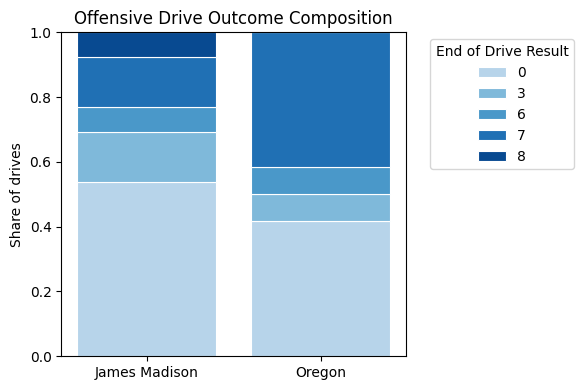

In [175]:
df = ofdrive_OU_vs_JMU_result_pct.copy()

ordered_results = sorted(df.columns)

cmap = plt.cm.Blues
colors = cmap(np.linspace(0.3, 0.9, len(ordered_results)))

plt.figure(figsize=(6,4))

bottom = np.zeros(len(df))
x = np.arange(len(df.index))

for col, color in zip(ordered_results, colors):
    plt.bar(
        x,
        df[col],
        bottom=bottom,
        color=color,
        edgecolor="white",
        linewidth=0.8,
        label=str(col)
    )
    bottom += df[col].values

plt.xticks(x, df.index)
plt.ylabel("Share of drives")
plt.title("Offensive Drive Outcome Composition")
plt.legend(title="End of Drive Result", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

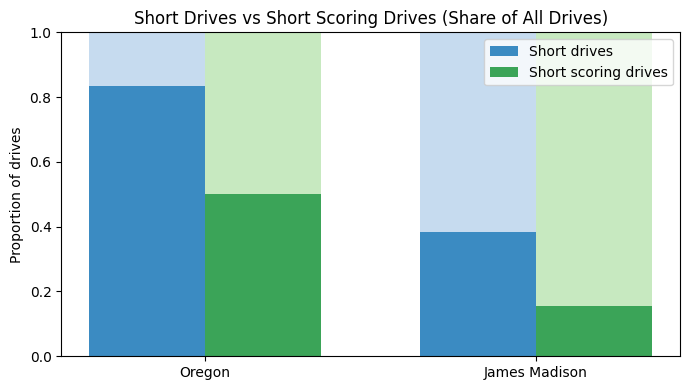

In [ ]:
summary = ofdrives_OU_vs_JMU_summary.set_index("offense")

labels = summary.index
x = np.arange(len(labels))
width = 0.35

# Extract metrics
short_drive_pct = summary["short_drives_percent"]
short_scoring_pct = summary["short_scoring_drives_percent"]

# Define colors
blue_dark  = cm.Blues(0.65)
blue_light = cm.Blues(0.25)

green_dark  = cm.Greens(0.65)
green_light = cm.Greens(0.25)

plt.figure(figsize=(7,4))

# ---- Short drives ----
plt.bar(
    x - width/2,
    short_drive_pct,
    width,
    color=blue_dark,
    label="Short drives"
)
plt.bar(
    x - width/2,
    1 - short_drive_pct,
    width,
    bottom=short_drive_pct,
    color=blue_light
)

# ---- Short scoring drives ----
plt.bar(
    x + width/2,
    short_scoring_pct,
    width,
    color=green_dark,
    label="Short scoring drives"
)
plt.bar(
    x + width/2,
    1 - short_scoring_pct,
    width,
    bottom=short_scoring_pct,
    color=green_light
)

# Axis & labels
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("Proportion of drives")
plt.title("Short Drives vs Short Scoring Drives (Share of All Drives)")
plt.legend()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.show()


In [158]:
for col in ["elapsed", "startTime", "endTime"]:
    drives_OM_vs_Tulane[col] = drives_OU_vs_JMU[col].apply(parse_structured_time)
    drives_OM_vs_Tulane[col + "_seconds"] = drives_OM_vs_Tulane[col].apply(time_dict_to_seconds)
drives_OM_vs_Tulane["is_short_drive_less_than_5"] = drives_OM_vs_Tulane["plays"].between(1, 5, inclusive="both")
drives_OM_vs_Tulane["is_short_scoring_drive"] = (drives_OM_vs_Tulane["is_short_drive_less_than_5"] & (drives_OM_vs_Tulane["scoring"]==True))

drives_OM_vs_Tulane

,offense,offenseConference,defense,defenseConference,gameId,id,driveNumber,scoring,startPeriod,startYardline,...,isHomeOffense,startOffenseScore,startDefenseScore,endOffenseScore,endDefenseScore,elapsed_seconds,startTime_seconds,endTime_seconds,is_short_drive_less_than_5,is_short_scoring_drive
0,Ole Miss,SEC,Tulane,American Athletic,401779842,4017798422,1,True,1,25,...,True,0,0,7,0,98.0,895.0,797.0,True,True
1,Tulane,American Athletic,Ole Miss,SEC,401779842,4017798424,2,False,1,75,...,False,0,7,0,7,483.0,797.0,314.0,False,False
2,Ole Miss,SEC,Tulane,American Athletic,401779842,4017798425,3,True,1,40,...,True,7,0,14,0,157.0,314.0,157.0,True,True
3,Tulane,American Athletic,Ole Miss,SEC,401779842,4017798427,4,False,1,75,...,False,0,14,0,14,270.0,157.0,787.0,False,False
4,Ole Miss,SEC,Tulane,American Athletic,401779842,4017798428,5,False,1,37,...,True,14,0,14,0,94.0,782.0,693.0,True,False
5,Tulane,American Athletic,Ole Miss,SEC,401779842,4017798429,6,True,1,82,...,False,0,14,3,14,57.0,693.0,636.0,True,True
6,Ole Miss,SEC,Tulane,American Athletic,401779842,40177984211,7,False,2,25,...,True,14,3,14,3,78.0,627.0,558.0,False,False
7,Tulane,American Athletic,Ole Miss,SEC,401779842,40177984212,8,False,2,81,...,False,3,14,3,14,191.0,558.0,367.0,False,False
8,Ole Miss,SEC,Tulane,American Athletic,401779842,40177984213,9,True,2,13,...,True,14,3,17,3,105.0,359.0,262.0,False,False
9,Tulane,American Athletic,Ole Miss,SEC,401779842,40177984215,10,False,2,67,...,False,3,17,3,17,163.0,257.0,94.0,True,False


In [159]:
ofdrives_OM_vs_Tulane_summary = (
    drives_OM_vs_Tulane.groupby("offense")
    .agg(
        drive_counts=("id", "count"),
        play_avg=("plays", "mean"),
        drives_time_avg=("elapsed_seconds", "mean"),
        yards_per_drive=("yards", "mean"),
        points_per_drive=("endOffenseScore", "mean"),
        short_drives_percent=("is_short_drive_less_than_5", "mean"),
        short_scoring_drives_percent=("is_short_scoring_drive", "mean")
    )
    .reset_index()
    .sort_values('drive_counts', ascending=True)
)
ofdrives_OM_vs_Tulane_summary

,offense,drive_counts,play_avg,drives_time_avg,yards_per_drive,points_per_drive,short_drives_percent,short_scoring_drives_percent
0,Ole Miss,12,5.583333,128.416667,41.75,24.250000,0.5,0.250000
1,Tulane,12,6.000000,147.833333,35.50,3.083333,0.5,0.166667
